In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("titanic.csv")

In [4]:
data.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data.fillna(method = "ffill", inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11472\3947609318.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = "ffill", inplace = True)


In [8]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          12
Embarked        0
dtype: int64

In [9]:
data.drop(columns=["Name", "Ticket","Cabin"], inplace = True)

In [10]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.125000    0.447368   
std     120.810458    0.481622    0.841838   13.905601    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   22.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.560845  
std      0.981429   55.856972  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.471875  
max      9.000000  512.329200

In [11]:
categorical = []
for col in data.columns:
    if data[col].dtype == "object":
        categorical.append(col)
print(categorical)    

['Sex', 'Embarked']


In [13]:
print(data["Sex"].unique())
data["Embarked"].unique()

['male' 'female']


array(['Q', 'S', 'C'], dtype=object)

In [15]:
data

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
0            892         0       3    male  34.5      0      0    7.8292   
1            893         1       3  female  47.0      1      0    7.0000   
2            894         0       2    male  62.0      0      0    9.6875   
3            895         0       3    male  27.0      0      0    8.6625   
4            896         1       3  female  22.0      1      1   12.2875   
..           ...       ...     ...     ...   ...    ...    ...       ...   
413         1305         0       3    male  28.0      0      0    8.0500   
414         1306         1       1  female  39.0      0      0  108.9000   
415         1307         0       3    male  38.5      0      0    7.2500   
416         1308         0       3    male  38.5      0      0    8.0500   
417         1309         0       3    male  38.5      1      1   22.3583   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 9 columns]

# Checking Data Behaviour 

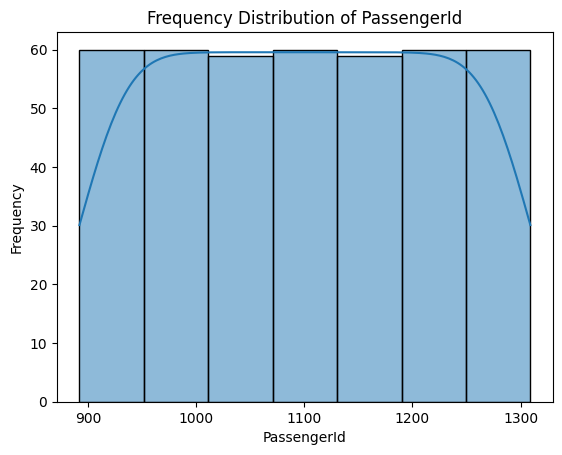

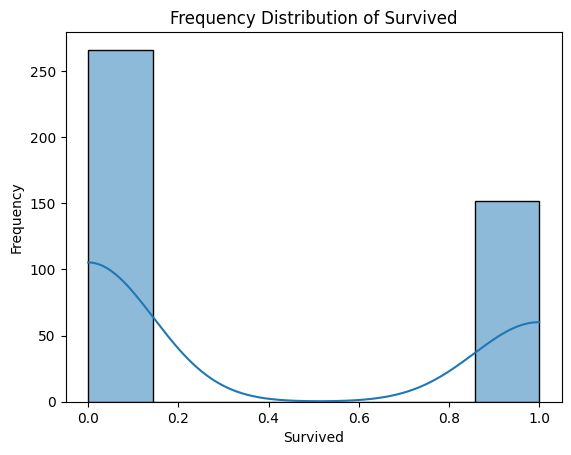

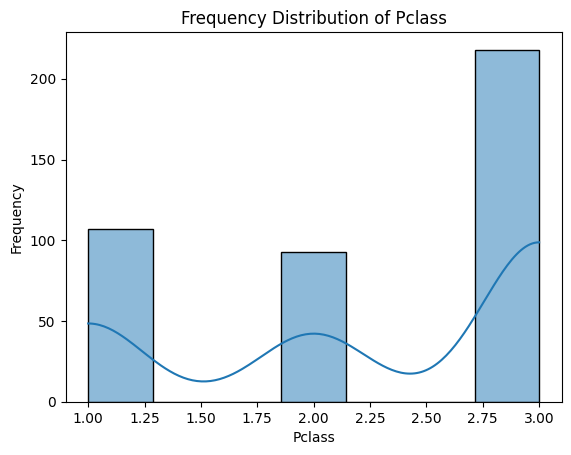

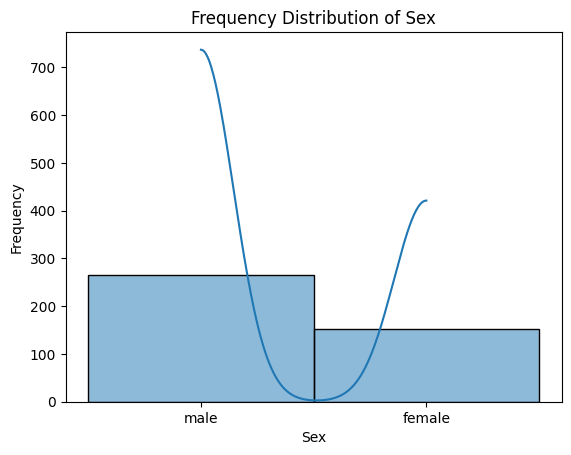

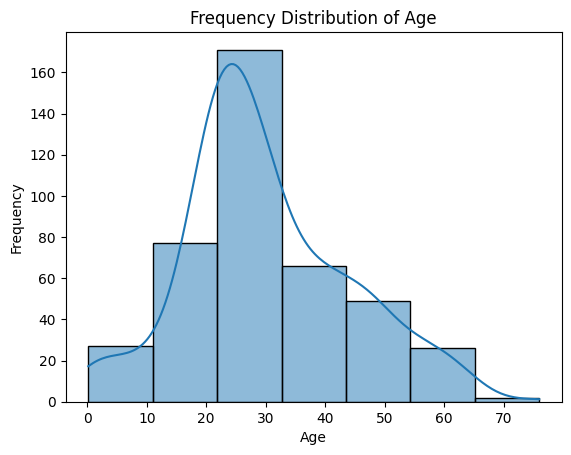

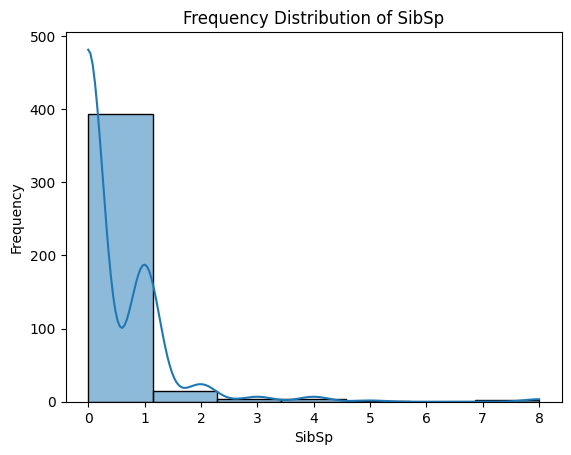

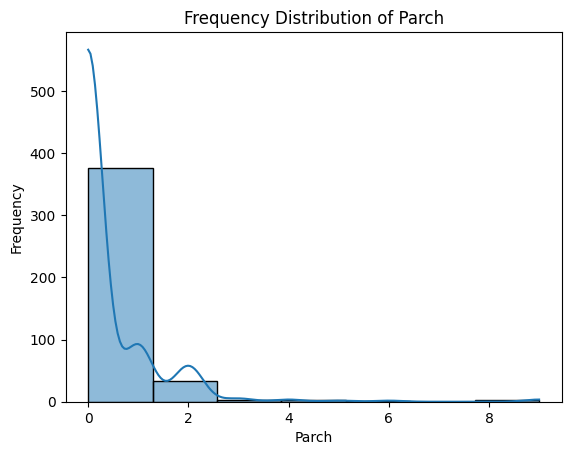

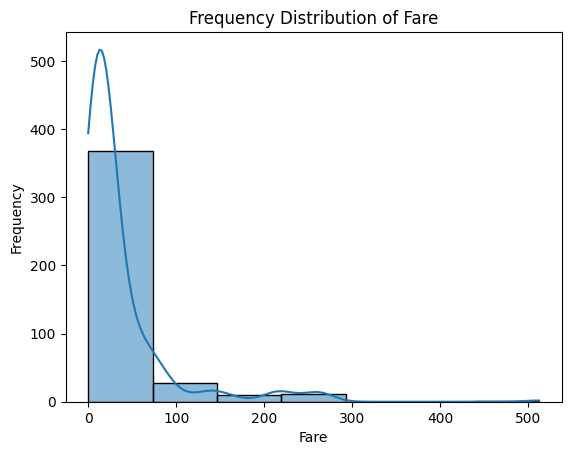

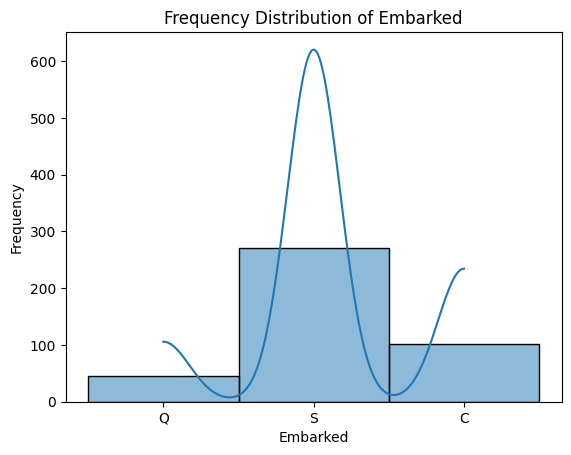

In [16]:
for col in data.columns:
    sns.histplot(data[col], kde = True, bins = 7)
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

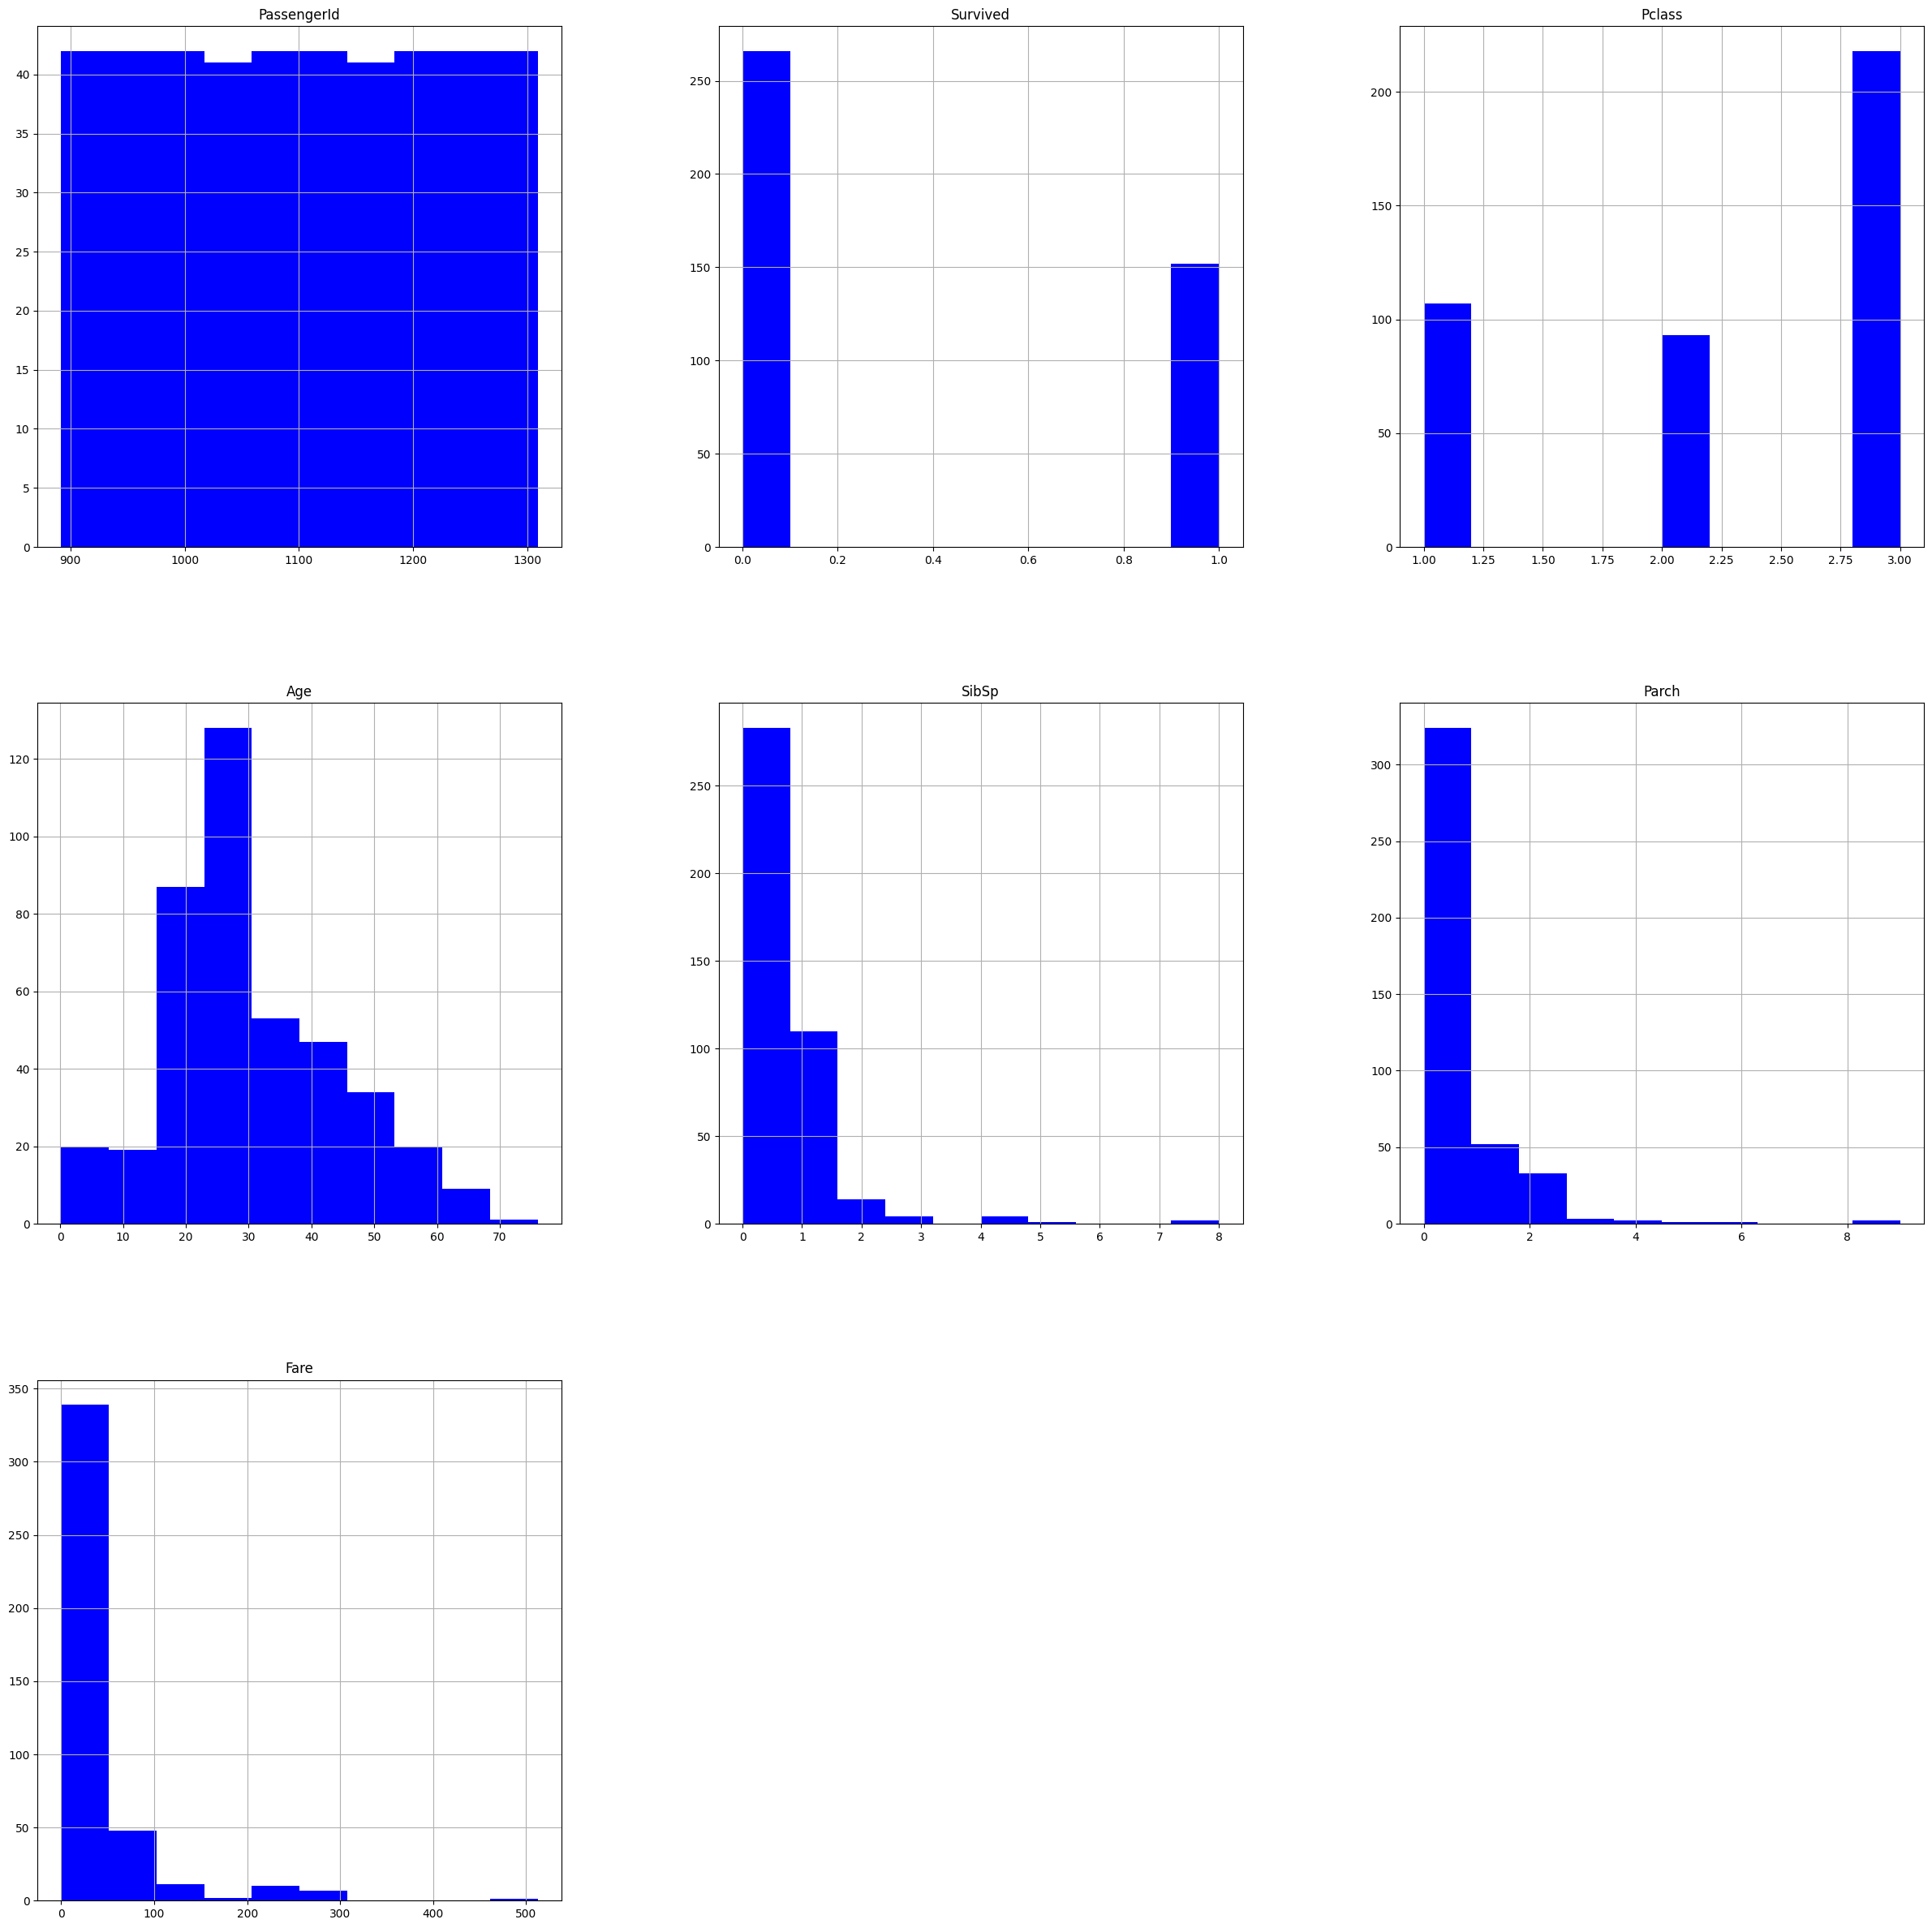

In [17]:
# Visualaizing the whole dataFrame By Plotting Histogram
data.hist(bins = 10, figsize = (30, 30), color = "blue")
plt.show()

# Bar Plot For Categorical Columns

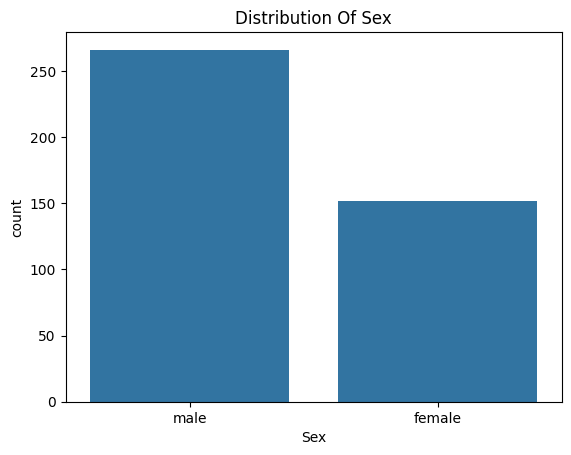

In [18]:
sns.countplot(x = "Sex", data = data)
plt.title("Distribution Of Sex")
plt.show()

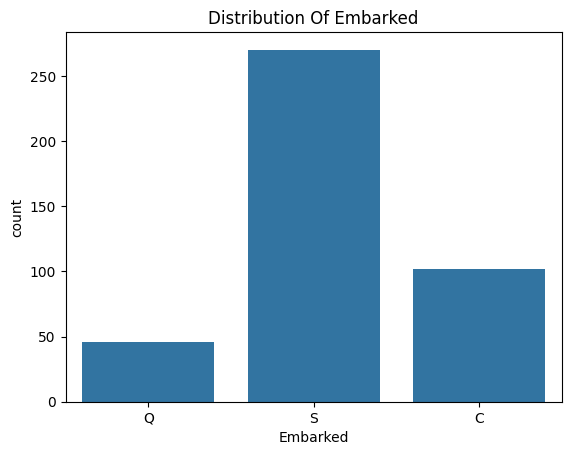

In [19]:
sns.countplot(x = "Embarked", data = data)
plt.title("Distribution Of Embarked")
plt.show()

We plot pair plots for continuous variables ton visualize relationships between all continuous variables in the dataset, along with their distributions.

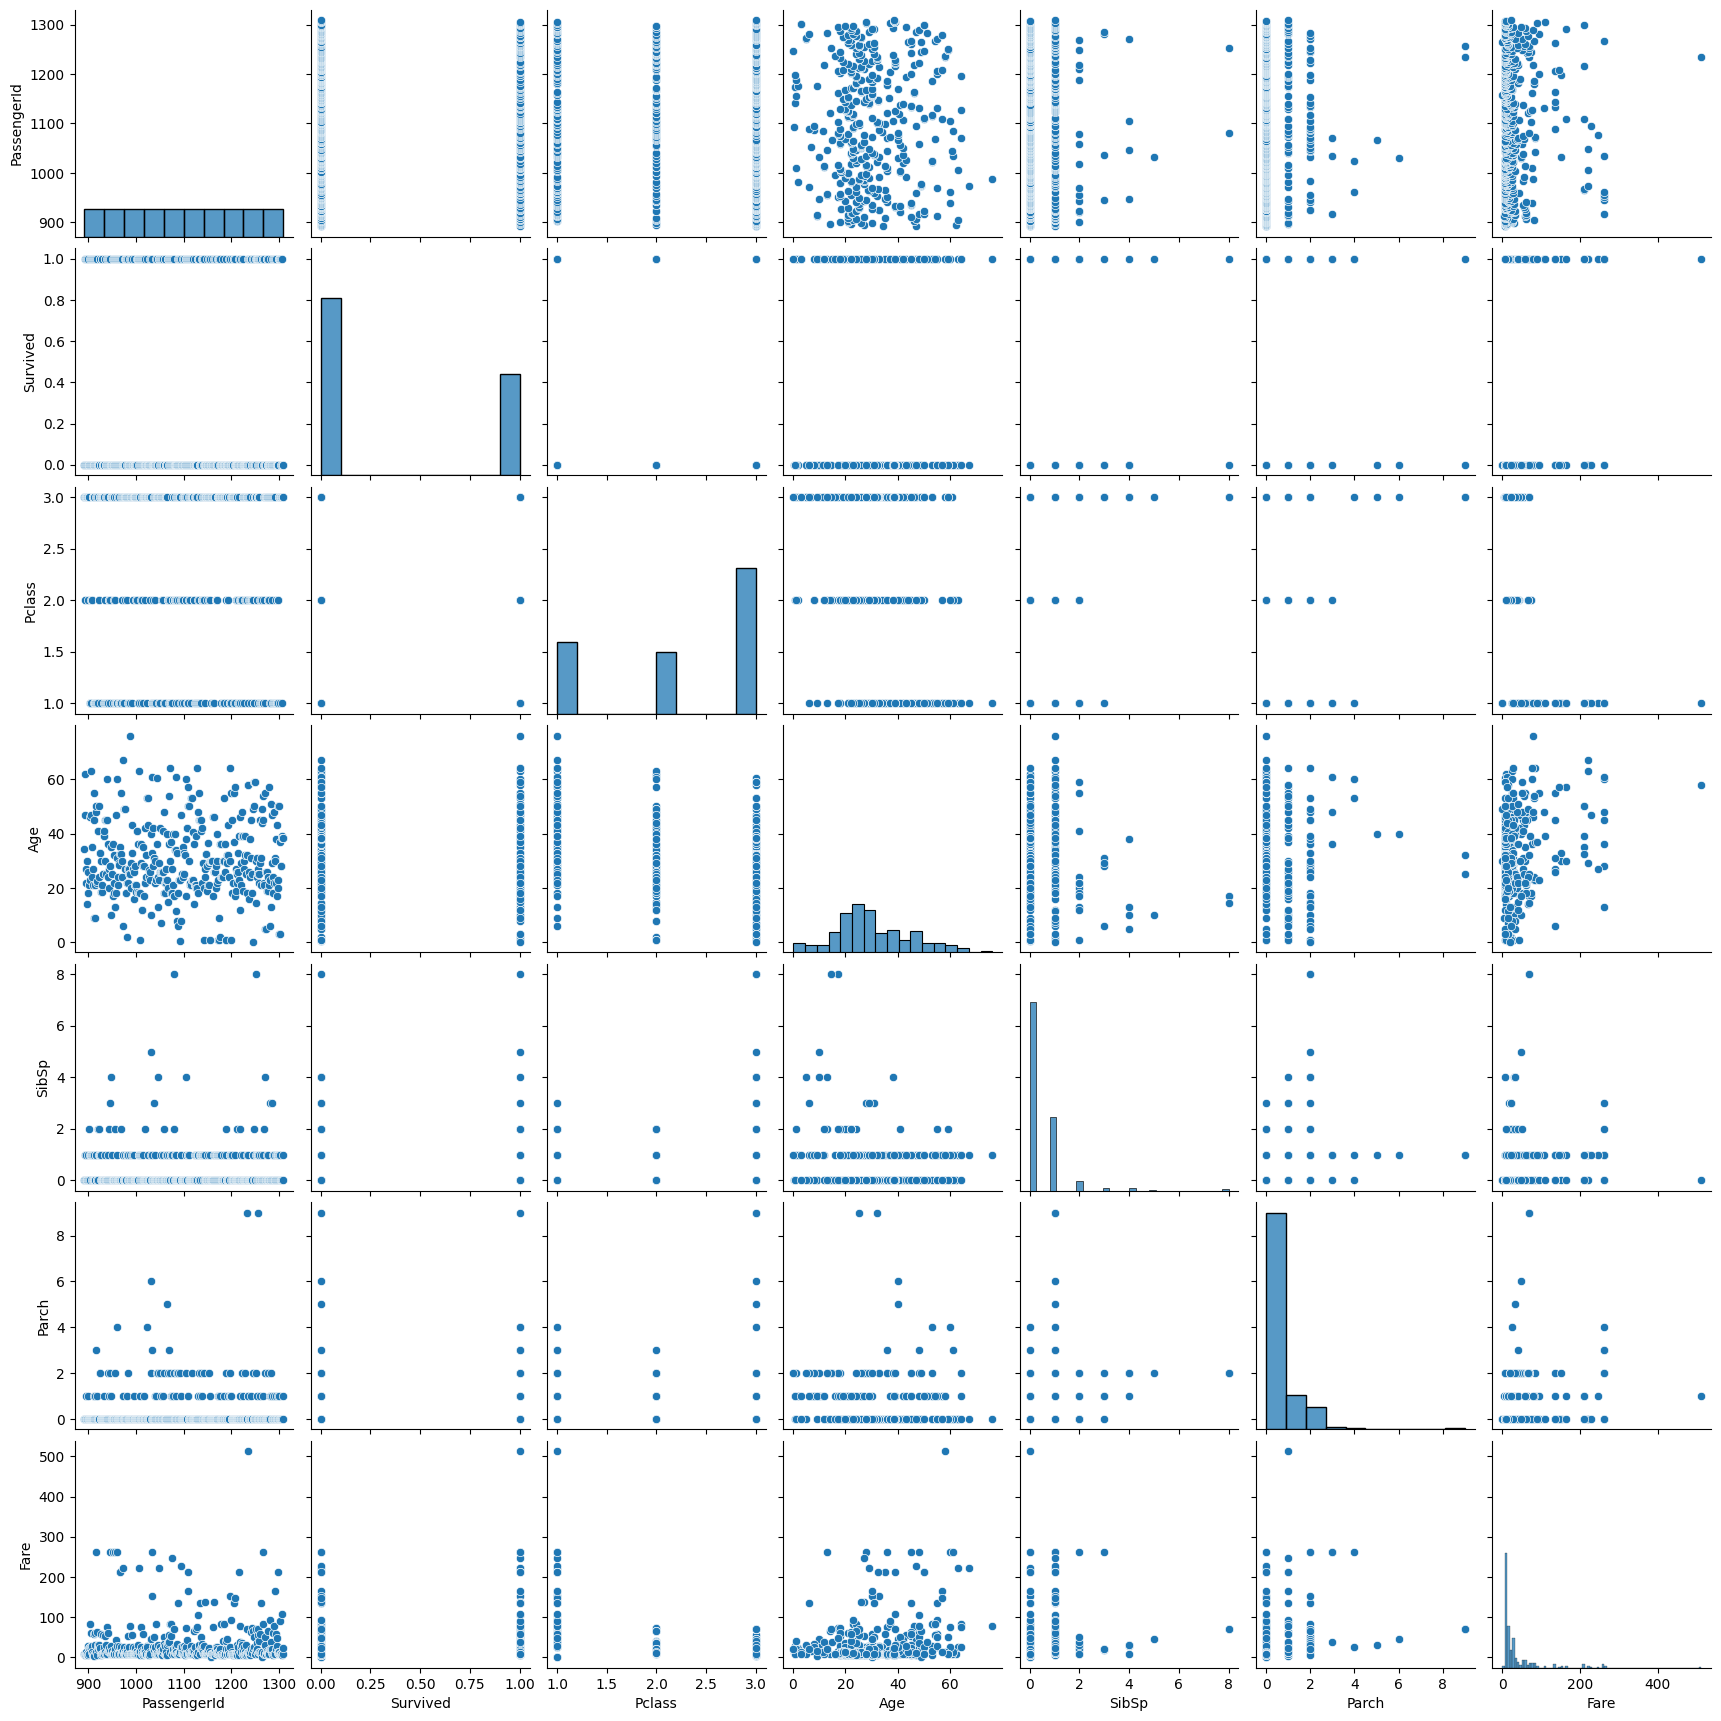

In [20]:
sns.pairplot(data)
plt.show()

# Encoding Categorical Columns

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [26]:
encoder = LabelEncoder()
for col in categorical:
    data[col] = encoder.fit_transform(data[col])

# Correlation Heatmap

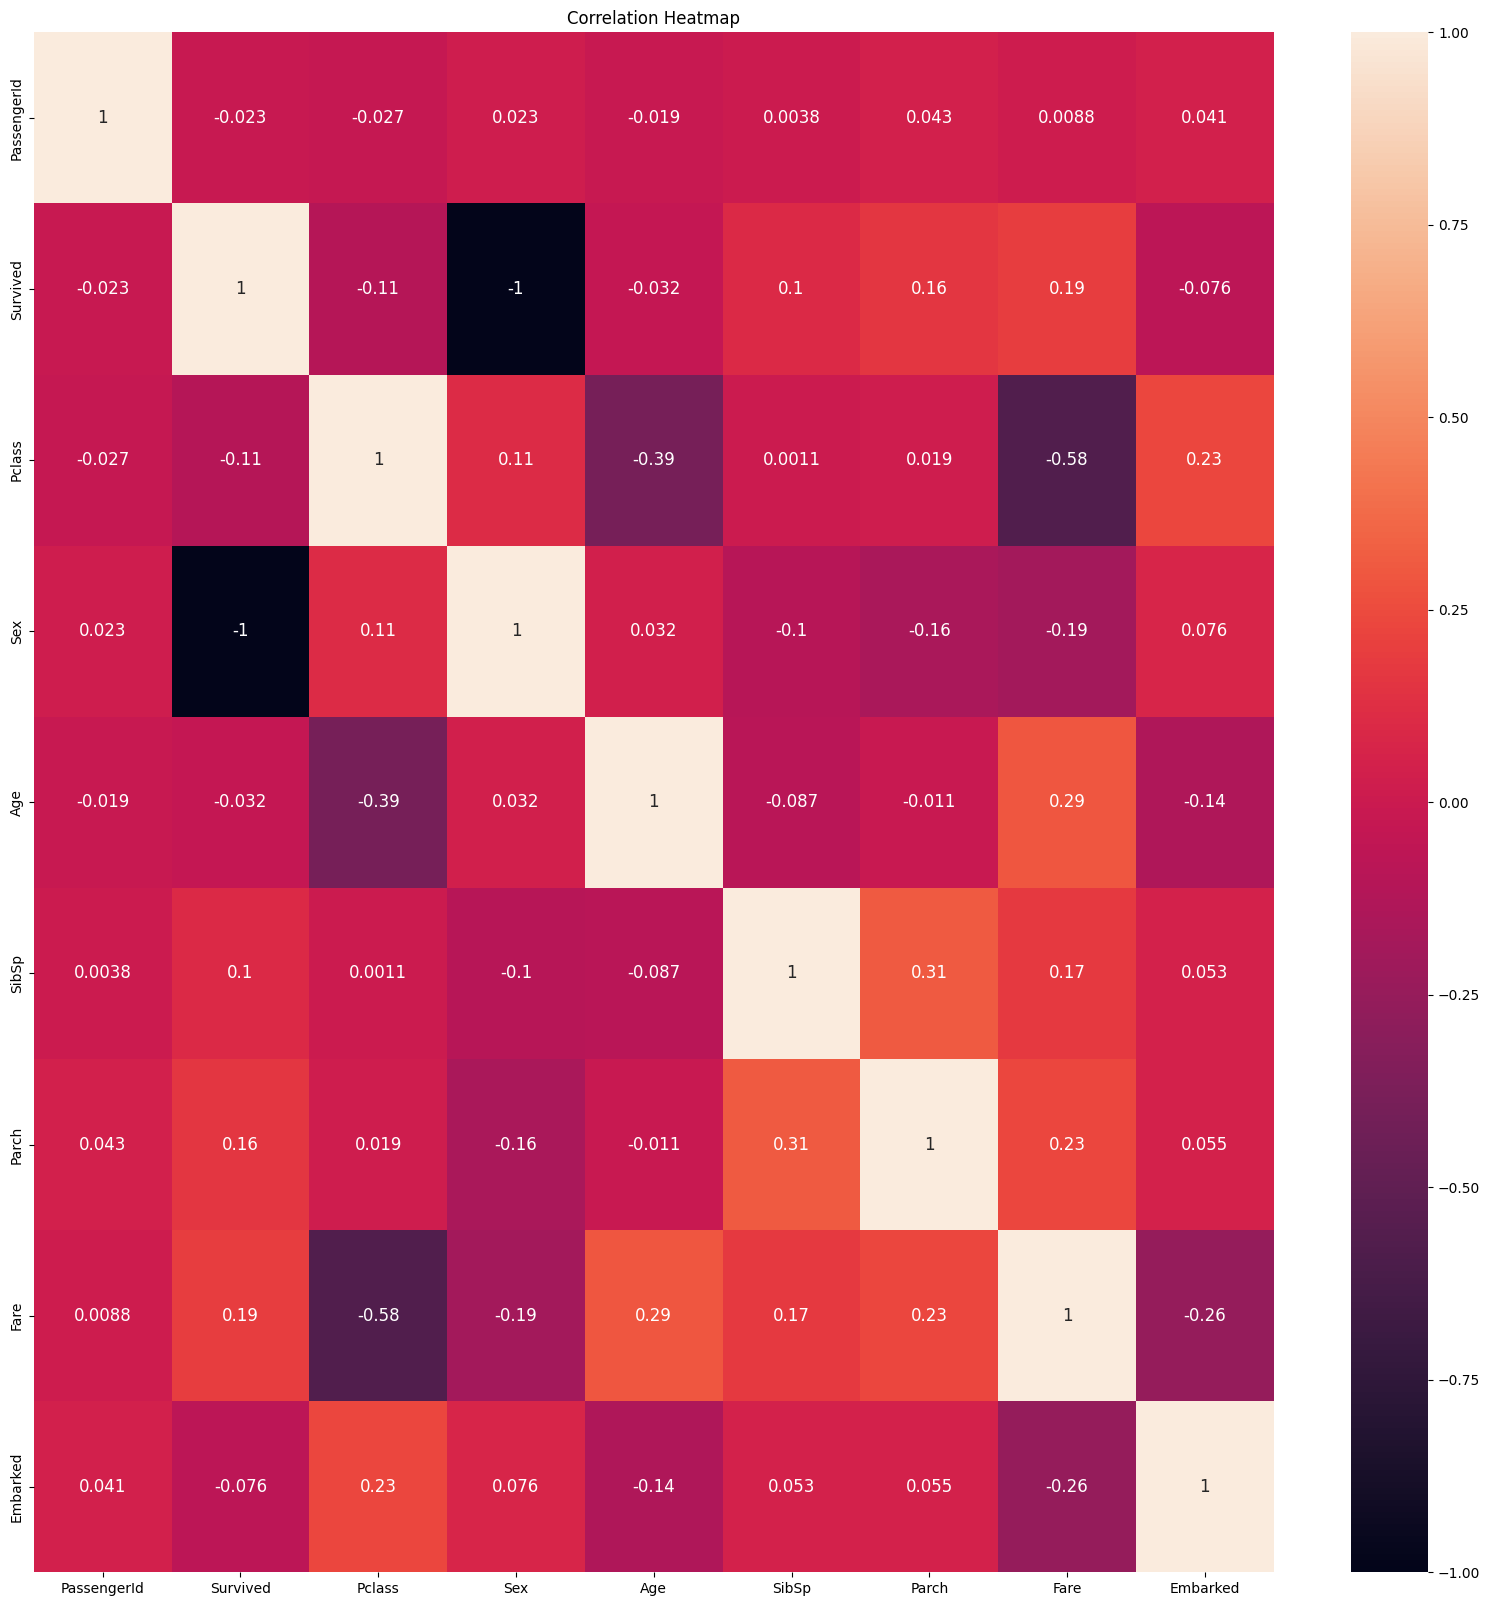

In [29]:
correlation = data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(correlation, annot = True, annot_kws = {"size" : 12})
plt.title("Correlation Heatmap")
plt.show()

# Data Relationship

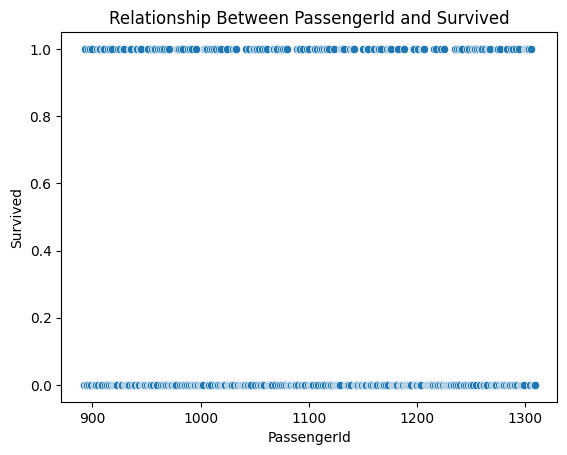

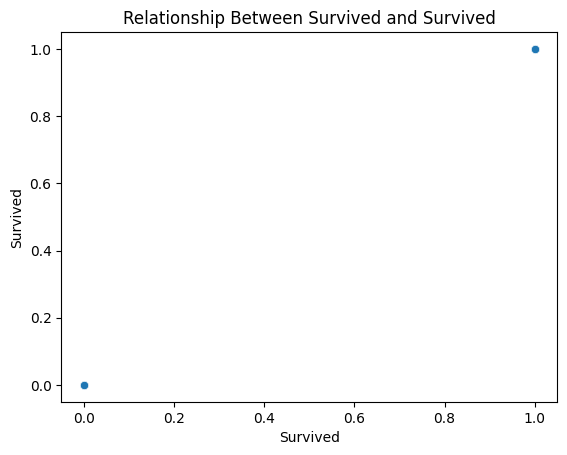

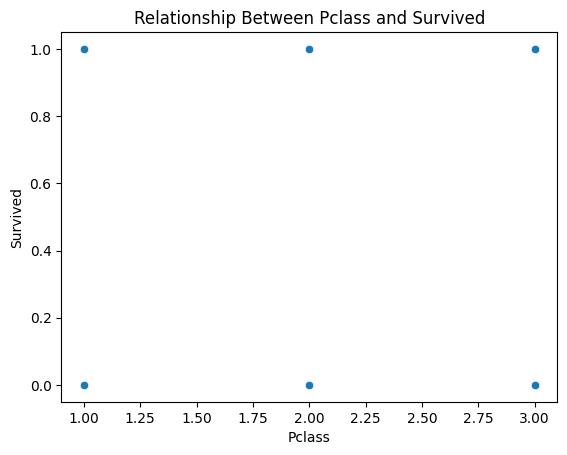

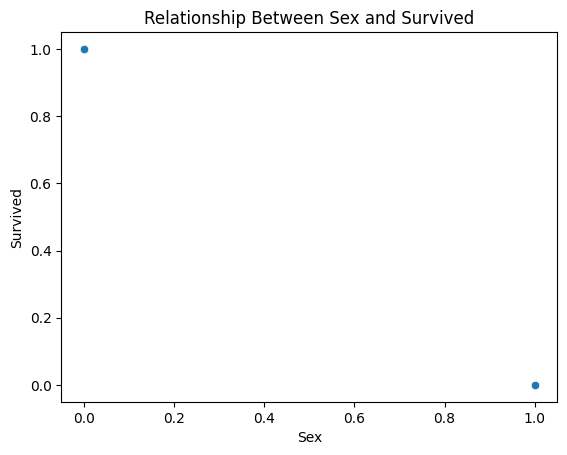

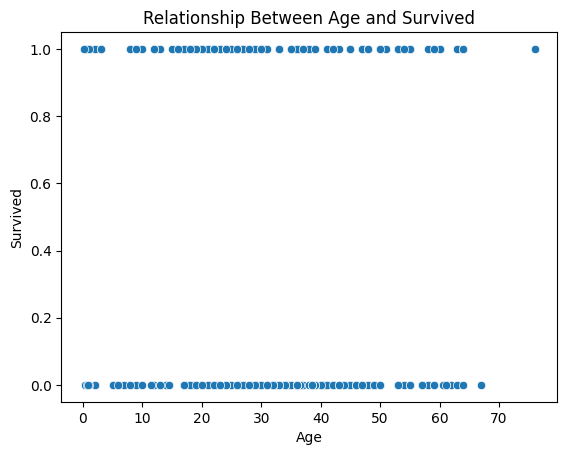

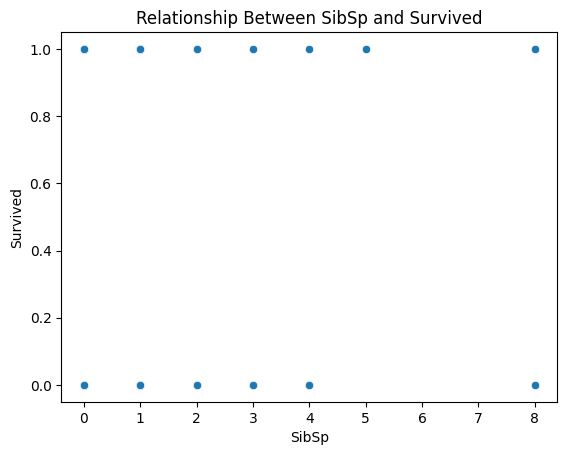

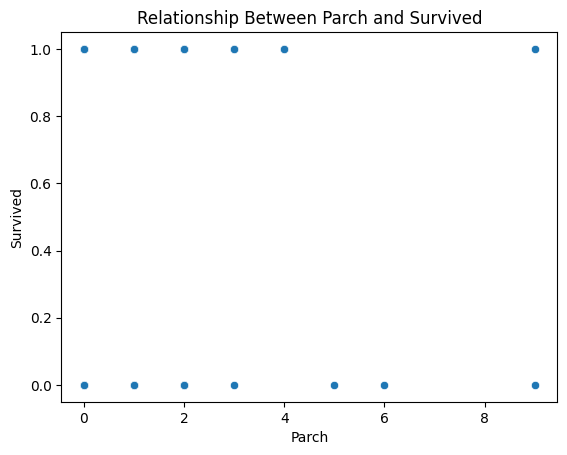

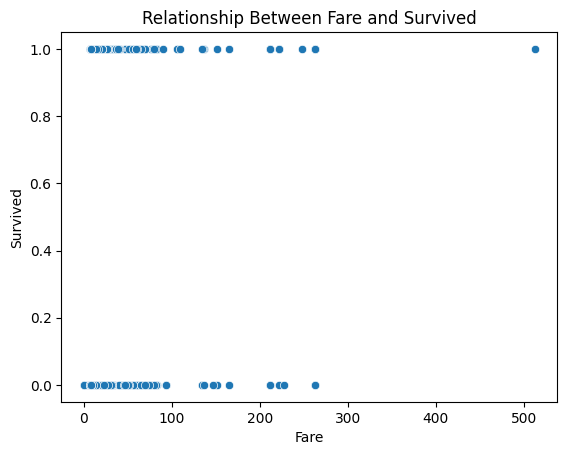

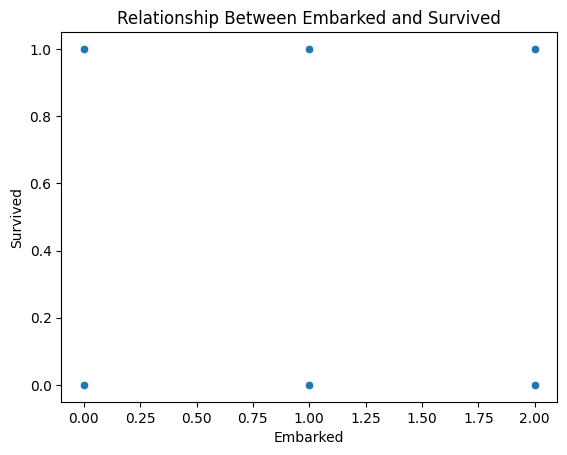

In [30]:
for col in data:
    sns.scatterplot(x = data[col], y = data["Survived"])
    plt.title(f"Relationship Between {col} and Survived")
    plt.xlabel(col)
    plt.ylabel("Survived")
    plt.show()

# Load Tools

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
# Splitting the data into Traing and testing Part 
x = data.drop("Survived", axis = 1)
y = data["Survived"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scalling the data

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
# fitting the data to the Model
model = DecisionTreeClassifier(criterion = "gini", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# checking accuracy 
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy is : ", accuracy)

Model accuracy is :  1.0


In [37]:
# Data Evaluation 
evaluation = pd.DataFrame({
    "Actual Value" : y_test,
    "Predicted Value" : y_pred,
    "Error" : y_test - y_pred
})
evaluation

Actual Value  Predicted Value  Error
321             0                0      0
324             1                1      0
388             0                0      0
56              0                0      0
153             1                1      0
..            ...              ...    ...
57              0                0      0
126             0                0      0
24              1                1      0
17              0                0      0
66              1                1      0

[84 rows x 3 columns]

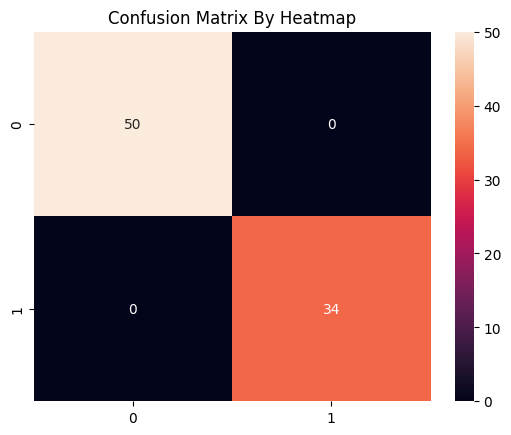

In [39]:
# Confusion Matrix With Heatmap
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True, fmt = "d", color = "blue")
plt.title("Confusion Matrix By Heatmap")
plt.show()